In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
X_test, y_test = make_moons(n_samples=100, noise=0.1, random_state=99)

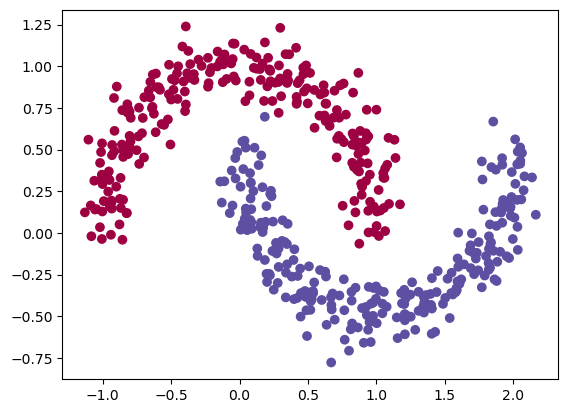

In [160]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Spectral)

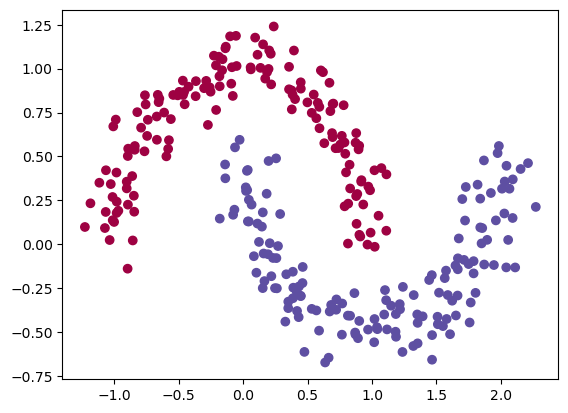

In [140]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [141]:
y=np.array(y)
X=np.array(X)
data=np.array([X[:,0],X[:,1],y]).T

np.random.shuffle(data)
label=data[:,2]
data=data[:,:2]

print(data.shape)
print(label.shape)

(300, 2)
(300,)


In [ ]:
def init_params():
    w1 = np.random.rand(10,2)*0.01
    b1 = np.zeros((10,1))
    w2 = np.random.rand(2,10)*0.01
    b2 = np.zeros((2,1))
    return w1,b1,w2,b2

def Relu(x):
    return np.maximum(0,x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True) 

def forward_prop(w1,b1,w2,b2,data):
    z1 = np.dot(w1,data.T) + b1
    a1 = Relu(z1)
    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
def one_hot(y, num_classes):
    
    one_hot_matrix = np.zeros((num_classes, y.size))
    one_hot_matrix[y, np.arange(y.size)] = 1
    return one_hot_matrix

def backprop(w2,label,data,z1,a1,z2,a2):
    m = data.shape[0]  
    y_onehot = one_hot(label, 2)
           
    dz2 = a2 - y_onehot
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (z1 > 0)
    dw1 = (1/m) * np.dot(dz1, data)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1,b1,w2,b2

def compute_cost(a2, y):
    m = y.size
    log_likelihood = -np.log(a2[y, np.arange(m)])
    cost = np.sum(log_likelihood) / m
    return cost

In [ ]:
def init_params_larger():
    w1 = np.random.randn(200, 2) * 0.01  
    b1 = np.zeros((200, 1))
    w2 = np.random.randn(2, 200) * 0.01
    b2 = np.zeros((2, 1))
    return w1, b1, w2, b2

In [183]:
w1, b1, w2, b2 = init_params_larger()

In [184]:


num_epochs = 7000
learning_rate = 0.2
costs = []


for epoch in range(num_epochs):
    
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
    costs.append(compute_cost(a2,y))
    dw1, db1, dw2, db2 = backprop(w2, y, X, z1, a1, z2, a2)

    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)


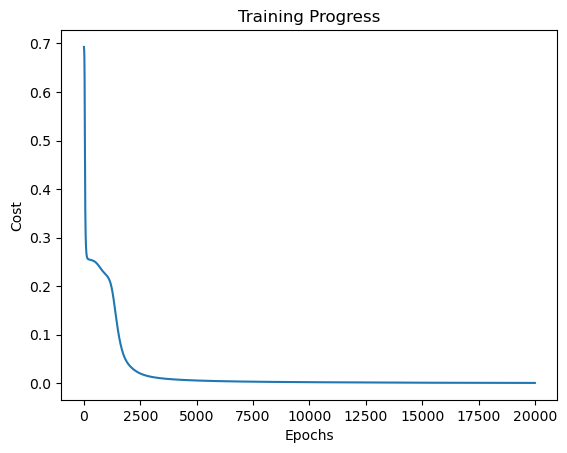

In [185]:
# After training, plot the cost curve
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.show()

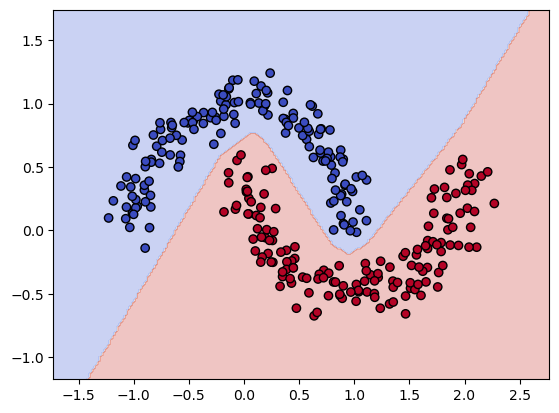

In [186]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, w1, b1, w2, b2):
    # make a dense grid of points
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]   # shape (N,2)

    # forward pass through trained params
    _, a1, _, a2 = forward_prop(w1, b1, w2, b2, grid)
    Z = np.argmax(a2, axis=0)   # predicted class
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.show()
plot_decision_boundary(data, label, w1, b1, w2, b2)